Hello and welcome to final project! here we have a task to make Product Range Analysis of e-commerce company.

our tasks:

****Analyze the store's product range.

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

# Step 1. Open the data file and read the general information

In [1]:
from datetime import datetime
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math as mth
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats as st
from matplotlib import rcParams
import warnings

In [2]:
#open data
try:
    df=pd.read_csv('ecommerce_dataset_us.csv', sep = '\t')
except:
    df=pd.read_csv('/Users/kirill/Downloads/a:b_test/ecommerce_dataset_us.csv', sep="\t", on_bad_lines='skip')

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


**Description of the data:**

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


# Step 2. Prepare the data for analysis:

In [5]:
# fix column names
df=df.rename(str.lower, axis='columns')

In [6]:
df['customerid'].isna().value_counts()

False    406829
True     135080
Name: customerid, dtype: int64

In [7]:
#change date time type
df['invoicedate']=pd.to_datetime(df['invoicedate'])
#add date column
df['date']=pd.to_datetime(df["invoicedate"]).dt.normalize()

In [8]:
#checking for missing values
df.isna().value_counts().reset_index()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,0
0,False,False,False,False,False,False,False,False,406829
1,False,False,False,False,False,False,True,False,133626
2,False,False,True,False,False,False,True,False,1454


we have a lot of missing values in customer id column. lets investigate can we cut something not interesting for analysis from here.

In [9]:
#drop 1454 rows with missing values in description and customer id columns
df_drop=df[df['description'].isna().to_list()]
df_drop

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN,2018-11-29
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN,2018-11-29
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN,2018-11-29
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN,2018-11-29
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN,2018-11-29
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN,2019-12-05
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN,2019-12-05
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN,2019-12-05
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN,2019-12-06


we can see that we have values with 0 unitprice and no name items, we can cut them off.

In [10]:
df_drop=df[df['description'].isna().to_list()]

In [11]:
df_clean= df[~df['description'].isin(df_drop['description'])]
df_clean

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,2019-12-07
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,2019-12-07
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07


In [12]:
#checking for duplicates
df_clean[df_clean.duplicated(subset=['description'], keep='last')]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
...,...,...,...,...,...,...,...,...
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2019-12-07 12:16:00,0.85,12713.0,2019-12-07
541824,581579,23084,RABBIT NIGHT LIGHT,24,2019-12-07 12:19:00,1.79,17581.0,2019-12-07
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2019-12-07 12:23:00,1.85,13777.0,2019-12-07
541879,581585,22726,ALARM CLOCK BAKELIKE GREEN,8,2019-12-07 12:31:00,3.75,15804.0,2019-12-07


In [13]:
df_clean['stockcode'].duplicated().value_counts()

True     536497
False      3958
Name: stockcode, dtype: int64

In [14]:
df1=df_clean['stockcode']
df1[df1.duplicated(keep=False)]

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: stockcode, Length: 540283, dtype: object

In [15]:
df_clean[df_clean.duplicated(['description','invoiceno', 'stockcode'])].sort_values('description')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
160509,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2019-04-16 13:17:00,2.55,18116.0,2019-04-16
483414,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2019-11-18 12:34:00,2.55,18110.0,2019-11-18
468720,576538,72800B,4 PURPLE FLOCK DINNER CANDLES,4,2019-11-13 12:42:00,2.55,14725.0,2019-11-13
312307,564346,23345,DOLLY GIRL BEAKER,12,2019-08-22 14:54:00,1.25,15727.0,2019-08-22
460098,575895,23345,DOLLY GIRL BEAKER,1,2019-11-09 14:50:00,1.25,17052.0,2019-11-09
...,...,...,...,...,...,...,...,...
411503,572219,23144,ZINC T-LIGHT HOLDER STARS SMALL,4,2019-10-19 13:17:00,0.83,17463.0,2019-10-19
346513,567186,84832,ZINC WILLIE WINKIE CANDLE STICK,4,2019-09-16 16:04:00,0.85,17073.0,2019-09-16
293016,562574,84832,ZINC WILLIE WINKIE CANDLE STICK,2,2019-08-05 12:42:00,0.85,14903.0,2019-08-05
104362,545166,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2019-02-26 14:03:00,0.85,17027.0,2019-02-26


we have a duplicates, but its normal, because we have a data by invoice number and customers, so we can see duplicates of items by they are sold for different customers or with different invoice number, wich is ok.

In [16]:
#check data for negative values
print((df_clean['quantity'] < 0).sum().sum())
print((df_clean['unitprice']<= 0).sum().sum())

9762
1063


In [17]:
df_clean[df_clean['unitprice']<=0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
6391,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,NaN,2018-12-01
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,NaN,2018-12-01
7313,537032,21275,?,-30,2018-12-01 16:50:00,0.0,NaN,2018-12-01
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2018-12-03 14:02:00,0.0,12647.0,2018-12-03
13217,537425,84968F,check,-20,2018-12-04 15:35:00,0.0,NaN,2018-12-04
...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,2019-12-05 18:38:00,0.0,NaN,2019-12-05
536908,581226,23090,missing,-338,2019-12-06 09:56:00,0.0,NaN,2019-12-06
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2019-12-06 13:58:00,0.0,NaN,2019-12-06
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2019-12-06 13:58:00,0.0,NaN,2019-12-06


we have a 587 rows with 0 unit price, but lets do nothing with that meanwhile coz we investigate a product range, not prices.

In [18]:
#lets drop 2 rows with negative unitprice to make our analyse more accurate
df_clean=df_clean.drop(index=[299983,299984])

In [19]:
#check how many data we have with negative values in quantity column
df_minus=df_clean[df_clean['quantity']<0]
df_minus

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0,2018-11-29
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0,2018-11-29
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0,2018-11-29
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,2018-11-29
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,2018-11-29
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0,2019-12-07
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0,2019-12-07
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0,2019-12-07
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0,2019-12-07


we have 9762 rows with negative quantity of purchased items, it can be a mistake, or maybe we sold it but with positive value, or maybe its a returned items. any way its small amount of orders, we can cut it off.

In [20]:
#drop quantity with minus values
df_clean= df_clean[~df_clean['quantity'].isin(df_minus['quantity'])]
df_clean

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,2019-12-07
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,2019-12-07
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07


In [21]:
#lets investigate quantity with abnormal values
df_clean['quantity'].value_counts()

1        148099
2         81763
12        61049
6         40846
4         38461
          ...  
142           1
261           1
648           1
74215         1
80995         1
Name: quantity, Length: 383, dtype: int64

items that was bought 74215 and 80995 times look like abnormal, lets see on it in data frame

In [22]:
df_clean.sort_values(by='quantity', ascending=False)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0,2019-12-07
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,2019-01-16
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2019-11-23 15:57:00,0.00,13256.0,2019-11-23
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.21,12901.0,2019-10-25
206121,554868,22197,SMALL POPCORN HOLDER,4300,2019-05-25 10:52:00,0.72,13135.0,2019-05-25
...,...,...,...,...,...,...,...,...
395604,571039,21591,COSY HOUR CIGAR BOX MATCHES,1,2019-10-11 12:59:00,1.25,16121.0,2019-10-11
151420,549555,20971,PINK BLUE FELT CRAFT TRINKET BOX,1,2019-04-08 12:52:00,1.25,13606.0,2019-04-08
151419,549555,20972,PINK CREAM FELT CRAFT TRINKET BOX,1,2019-04-08 12:52:00,1.25,13606.0,2019-04-08
151417,549555,22604,SET OF 4 NAPKIN CHARMS CUTLERY,1,2019-04-08 12:52:00,2.55,13606.0,2019-04-08


In [23]:
df_clean.query('description == "MEDIUM CERAMIC TOP STORAGE JAR"')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,2019-01-16
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2019-05-10 10:10:00,1.04,14646.0,2019-05-10
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2019-05-10 12:11:00,1.25,16745.0,2019-05-10
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2019-05-10 16:29:00,1.25,14651.0,2019-05-10
187868,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,2019-05-10 16:52:00,1.25,13601.0,2019-05-10
...,...,...,...,...,...,...,...,...
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2019-12-05 12:16:00,1.25,15984.0,2019-12-05
536248,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2019-12-06 09:28:00,2.46,NaN,2019-12-06
539776,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2019-12-06 16:30:00,2.46,NaN,2019-12-06
540301,581476,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2019-12-07 08:48:00,1.04,12433.0,2019-12-07


In [24]:
df_clean.query('customerid == 12346.0')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,2019-01-16


looks like incredible but lets leave it for now.

In [25]:
#lets take a look is every stock code belong to item in description, by logic it should be: one stock code one item.
df_clean.groupby('stockcode')['description'].nunique().sort_values(ascending=False).head(10)

stockcode
23084     6
20713     6
23203     4
22734     4
23196     4
21181     4
23236     4
23131     4
23209     4
85123A    3
Name: description, dtype: int64

not every stock code is one item, lets go deeper and investigate what does it means.

In [26]:
df_clean.query('stockcode == "23084"')['description'].unique()

array(['RABBIT NIGHT LIGHT', 'allocate stock for dotcom orders ta',
       'add stock to allocate online orders', 'for online retail orders',
       'Amazon', 'website fixed'], dtype=object)

In [27]:
df_clean.query('stockcode == "20713"')['description'].unique()

array(['JUMBO BAG OWLS', 'found', 'Found', 'wrongly marked 23343',
       'Marked as 23343', 'wrongly coded 23343'], dtype=object)

In [28]:
df_clean.query('stockcode == "23203"')['description'].unique()

array(['mailout', 'JUMBO BAG DOILEY PATTERNS',
       'JUMBO BAG VINTAGE DOILEY ', 'JUMBO BAG VINTAGE DOILY '],
      dtype=object)

we can see here that in stock code 23084 we have RABBIT NIGHT LIGHT item belong to this code, and the rest items is looks like a trash :)<br>
also we can see that all the items are written with capital letters, so we can drop all rows where we have non capital letters in description column.

In [29]:
#drop rows with lowercase item desciption.
df_clean = df_clean[~df_clean['description'].str.islower()]
df_clean

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,2019-12-07
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,2019-12-07
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07


In [30]:
#lets filter our data by unit price and take a look is there any anomalys
df_clean.groupby(['unitprice']).max().sort_values('unitprice', ascending=False).head(10)

,invoiceno,stockcode,description,quantity,invoicedate,customerid,date
unitprice,,,,,,,
13541.33,537632,AMAZONFEE,AMAZON FEE,1,2018-12-05 15:08:00,NaN,2018-12-05
11062.06,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,NaN,2019-08-10
8142.75,551697,POST,POSTAGE,1,2019-05-01 13:46:00,16029.0,2019-05-01
4505.17,562955,DOT,DOTCOM POSTAGE,1,2019-08-09 10:14:00,NaN,2019-08-09
4287.63,560373,M,Manual,1,2019-07-16 12:30:00,NaN,2019-07-16
4161.06,573080,M,Manual,1,2019-10-25 14:20:00,12536.0,2019-10-25
3949.32,571751,M,Manual,1,2019-10-17 11:18:00,12744.0,2019-10-17
3155.95,569382,M,Manual,1,2019-10-01 16:44:00,15502.0,2019-10-01
2653.95,567353,M,Manual,1,2019-09-17 16:14:00,NaN,2019-09-17


as we analyse product range we dont need fees, post and  other data not belong to range asortment, so we can drop it.

In [31]:
df_drop2=df_clean.query("stockcode in ('AMAZONFEE','B','POST', 'M', 'DOT')")
df_clean= df_clean[~df_clean['stockcode'].isin(df_drop2['stockcode'])]

In [32]:
#define quarters
warnings.filterwarnings('ignore')
df_clean['quarter'] = pd.PeriodIndex(df_clean.date, freq='Q')
df_clean

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,2018Q4
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,2018Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018Q4
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,2019-12-07,2019Q4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,2019-12-07,2019Q4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07,2019Q4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,2019-12-07,2019Q4


### assign groups: cheap, average, expensive

In [140]:
df_clean.describe()

,quantity,unitprice,customerid,revenue
count,528399.000000,528399.000000,396519.000000,528399.000000
mean,10.607707,3.276458,15301.351718,19.453861
std,156.860014,4.448566,1709.777503,268.443856
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,13975.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,11.000000,4.130000,16801.000000,17.400000
max,80995.000000,649.500000,18287.000000,168469.600000


In [147]:
conditions = [
    (df_clean['unitprice'] <= 1.25),
    (df_clean['unitprice'] > 1.25) & (df_clean['unitprice'] <= 4.13),
    (df_clean['unitprice'] > 4.13)
    ]

# create a list of the values we want to assign for each condition
values = ['cheap', 'average', 'expensive']

# create a new column and use np.select to assign values to it using our lists as arguments
df_clean['group'] = np.select(conditions, values)

# display updated DataFrame
df_clean.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,quarter,revenue,group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,2018Q4,15.30,average
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018Q4,20.34,average
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,2018Q4,22.00,average
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018Q4,20.34,average
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,2018Q4,20.34,average


# Step 3. Exploratory data analysis:

## study the product: quantity, price, popular sells, selling by date.

## quantity

lets just look on quantity of our items

In [33]:
df_clean.describe()

,quantity,unitprice,customerid
count,528399.000000,528399.000000,396519.000000
mean,10.607707,3.276458,15301.351718
std,156.860014,4.448566,1709.777503
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.080000,15159.000000
75%,11.000000,4.130000,16801.000000
max,80995.000000,649.500000,18287.000000


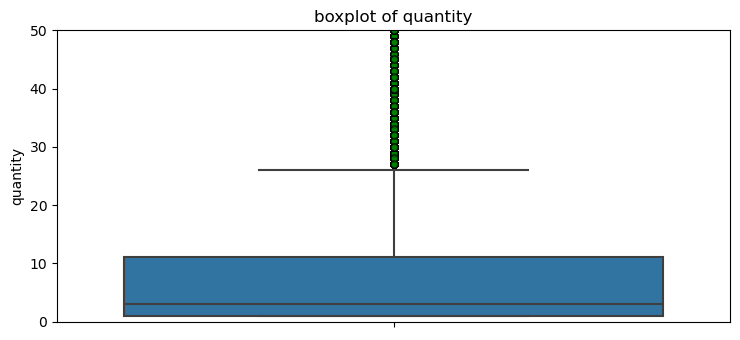

In [34]:
#plot boxplot to show outliers of quantity of items from our data.
flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.boxplot(y=df_clean["quantity"], flierprops=flierprops)
plt.ylim(0, 50)
plt.title('boxplot of quantity')
plt.show()

graph shows that most of items are sold in quantity of 10. more then 20 is outliers.

In [35]:
#lets investigate Which item has the highest quantity value.
df_clean.sort_values(by='quantity', ascending=False).head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,quarter
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0,2019-12-07,2019Q4
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,2019-01-16,2019Q1
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2019-11-23 15:57:00,0.00,13256.0,2019-11-23,2019Q4
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.21,12901.0,2019-10-25,2019Q4
206121,554868,22197,SMALL POPCORN HOLDER,4300,2019-05-25 10:52:00,0.72,13135.0,2019-05-25,2019Q2
220843,556231,85123A,?,4000,2019-06-07 15:04:00,0.00,NaN,2019-06-07,2019Q2
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2019-02-20 10:43:00,0.82,18087.0,2019-02-20,2019Q1
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2019-07-17 17:04:00,0.06,14609.0,2019-07-17,2019Q3
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-01-09 12:55:00,2.10,15749.0,2019-01-09,2019Q1
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-04-16 13:20:00,2.10,15749.0,2019-04-16,2019Q2


paper cup and ceramic jar is a winners, paper stickers sold by 0 price, looks anomaly. We have here item: "?" wich is a mistake.

In [36]:
#lets take a look on quantity per invoice number, it will tell us how much customer buy per one order.
df_clean.groupby('invoiceno')['quantity'].sum().sort_values(ascending=False).reset_index()

,invoiceno,quantity
0,581483,80995
1,541431,74215
2,556917,15049
3,563076,14730
4,574941,14149
...,...,...
19838,538194,1
19839,560367,1
19840,546550,1
19841,538188,1


top 2 still cups and ceramic jar, and it was orders just for cups and jars. top 3 close invoice number #556917, lets take a look what was the order.

In [37]:
#check inoice number 556917
df_clean.query('invoiceno == "556917"')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,quarter
228154,556917,21992,VINTAGE PAISLEY STATIONERY SET,12,2019-06-13 13:37:00,1.25,12415.0,2019-06-13,2019Q2
228155,556917,21993,FLORAL FOLK STATIONERY SET,60,2019-06-13 13:37:00,1.25,12415.0,2019-06-13,2019Q2
228156,556917,21933,PINK VINTAGE PAISLEY PICNIC BAG,100,2019-06-13 13:37:00,1.65,12415.0,2019-06-13,2019Q2
228157,556917,21990,MODERN FLORAL STATIONERY SET,72,2019-06-13 13:37:00,1.25,12415.0,2019-06-13,2019Q2
228158,556917,84944,SET OF 6 KASHMIR FOLKART BAUBLES,60,2019-06-13 13:37:00,1.65,12415.0,2019-06-13,2019Q2
...,...,...,...,...,...,...,...,...,...
228287,556917,22360,GLASS JAR ENGLISH CONFECTIONERY,96,2019-06-13 13:37:00,2.55,12415.0,2019-06-13,2019Q2
228288,556917,22364,GLASS JAR DIGESTIVE BISCUITS,24,2019-06-13 13:37:00,2.55,12415.0,2019-06-13,2019Q2
228289,556917,22363,GLASS JAR MARMALADE,24,2019-06-13 13:37:00,2.55,12415.0,2019-06-13,2019Q2
228290,556917,21115,ROSE CARAVAN DOORSTOP,16,2019-06-13 13:37:00,5.95,12415.0,2019-06-13,2019Q2


looks like regular big order.

In [38]:
#qunatity per customer
df_clean.groupby('customerid')['quantity'].sum().sort_values(ascending=False).reset_index()

,customerid,quantity
0,14646.0,197420
1,16446.0,80997
2,14911.0,80513
3,12415.0,77669
4,12346.0,74215
...,...,...
4331,15510.0,2
4332,16257.0,2
4333,13452.0,2
4334,15823.0,1


we have customer leader by number of quantity, 197491 item. lets take a look what he bought.

In [39]:
#lets investigate quantity of saled items per day
df_grp_date=df_clean.groupby('date')['quantity'].sum().reset_index()
df_grp_date

,date,quantity
0,2018-11-29,26910
1,2018-11-30,31328
2,2018-12-01,16177
3,2018-12-03,16372
4,2018-12-04,21770
...,...,...
300,2019-12-03,43757
301,2019-12-04,30437
302,2019-12-05,41858
303,2019-12-06,35606


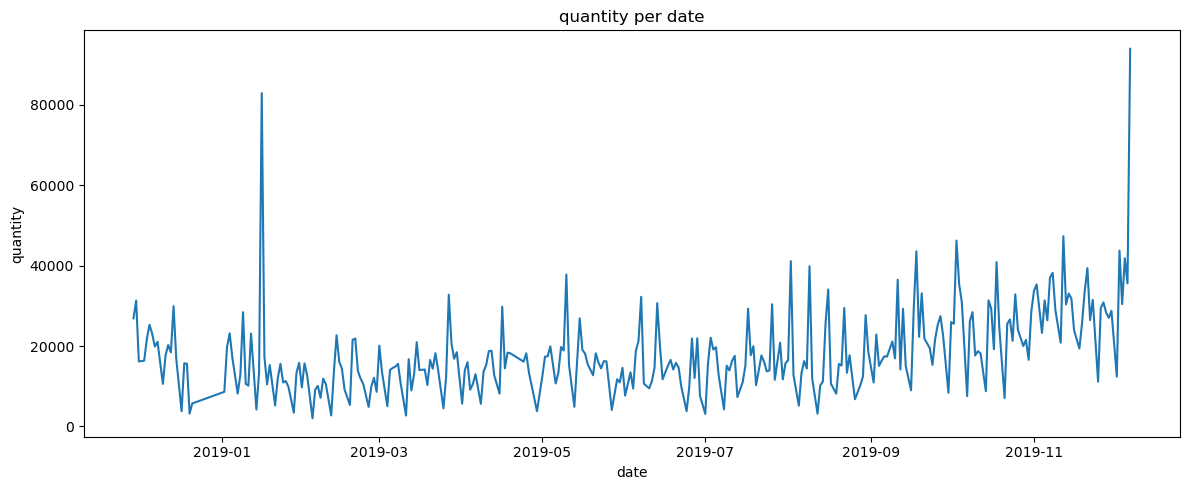

In [40]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
sns.lineplot(data=df_grp_date, x='date', y='quantity', palette="tab10", linewidth=1.5)
plt.title('quantity per date')
plt.show()

graph shows 2 outliers, thats ours cups and jars, wich has biggest quantity :) graphs shows positive groth at the second part of 2019 year.

## item price and revenue

In [119]:
df_clean['revenue']=df_clean['unitprice']*df_clean['quantity']
df_revenue=df_clean.groupby('date')['revenue'].sum().reset_index()
df_revenue

,date,revenue
0,2018-11-29,57676.33
1,2018-11-30,47730.38
2,2018-12-01,44833.98
3,2018-12-03,31318.99
4,2018-12-04,51973.43
...,...,...
300,2019-12-03,80182.35
301,2019-12-04,55411.69
302,2019-12-05,72937.70
303,2019-12-06,77694.64


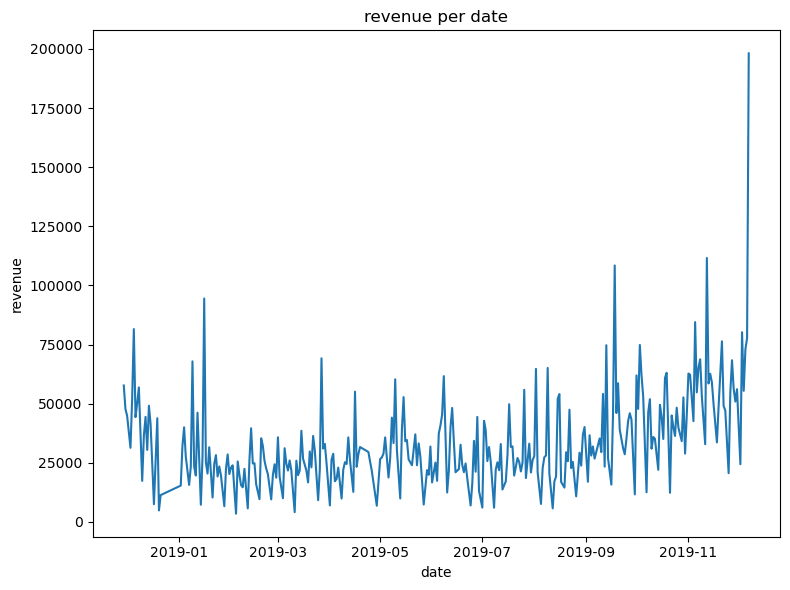

In [138]:
#lets take a look on revenue per date
plt.rcParams["figure.figsize"] = [8, 6]
sns.lineplot(data=df_revenue, x='date', y='revenue')
plt.title('revenue per date')
plt.show()

as quantity growth at the second part of 2019 year, the unit price growth aswell. we have pretty high value of price in movember-december 2018


</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Team Lead's comment:Is this revenue or just sum of price? Please check</b>
    

In [121]:
#lets check the item with a biggest revenue
df_clean.groupby(['revenue']).max().sort_values('revenue', ascending=False).head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,date,quarter
revenue,,,,,,,,,
168469.60,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0,2019-12-07,2019Q4
77183.60,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,2019-01-16,2019Q1
38970.00,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,649.50,15098.0,2019-06-08,2019Q2
7144.72,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2019-09-18 11:05:00,5.06,17450.0,2019-09-18,2019Q3
6539.40,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-04-16 13:20:00,2.10,15749.0,2019-04-16,2019Q2
4992.00,573003,23084,RABBIT NIGHT LIGHT,2400,2019-10-25 12:11:00,2.08,14646.0,2019-10-25,2019Q4
4921.50,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2019-01-09 12:55:00,2.55,15749.0,2019-01-09,2019Q1
4781.60,576365,22086,PAPER CHAIN KIT 50'S CHRISTMAS,688,2019-11-12 17:55:00,6.95,NaN,2019-11-12,2019Q4
4632.00,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2019-04-16 13:20:00,2.40,15749.0,2019-04-16,2019Q2


item that brought biggest revenue is `PAPER CRAFT , LITTLE BIRDIE` was sold in Q42019, we can assign it as cristmas item.

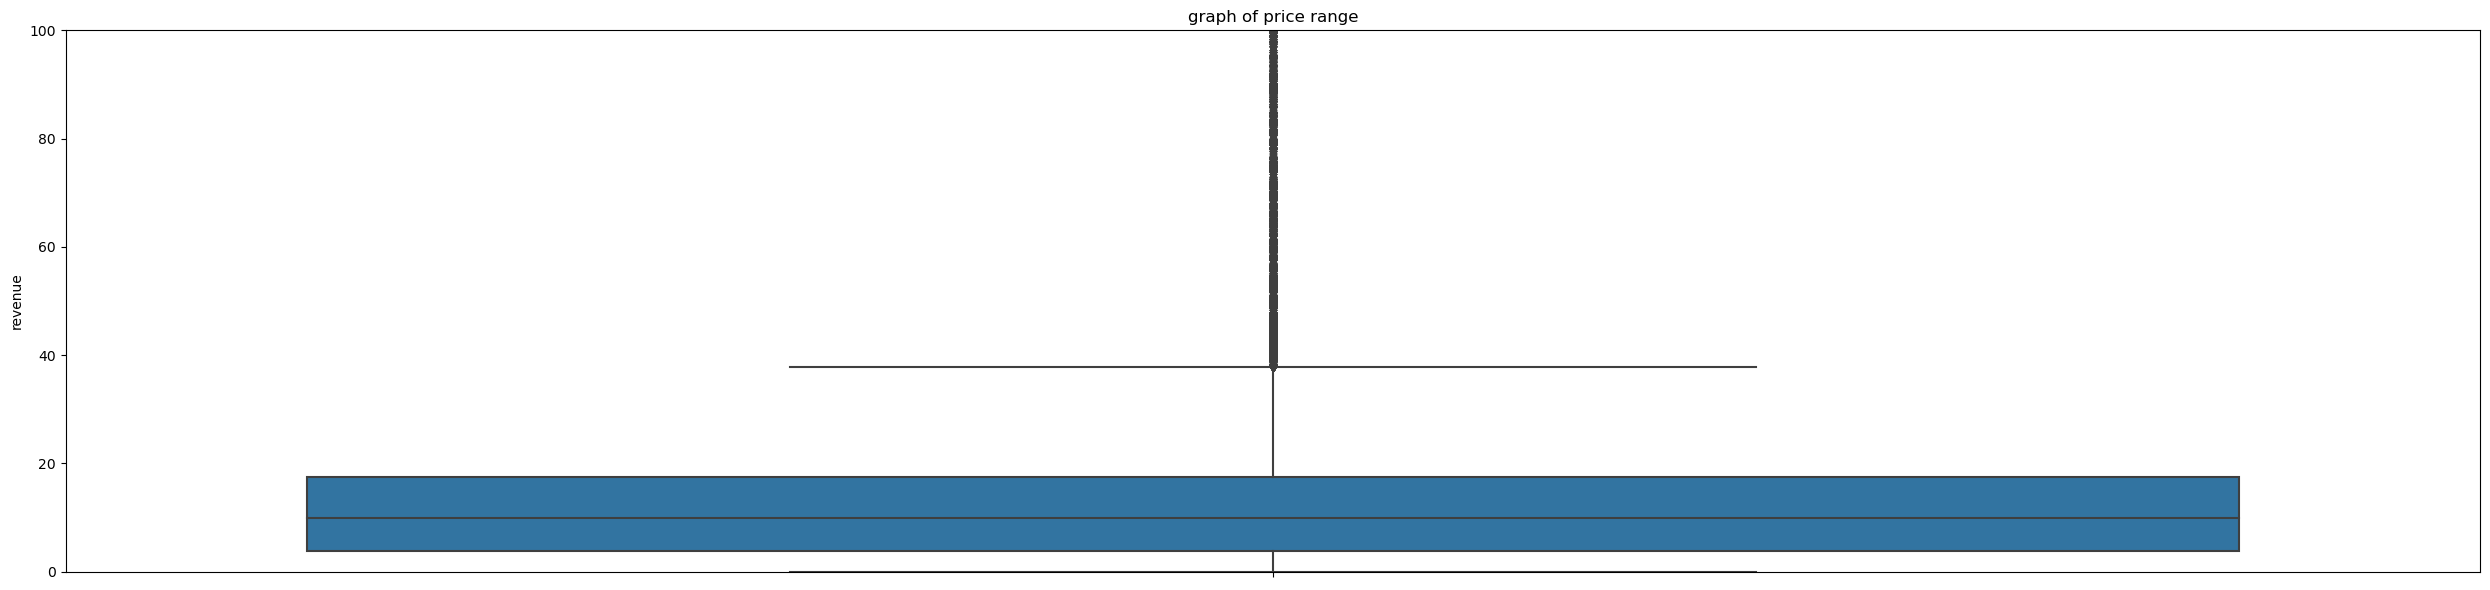

In [122]:
#plot boxplot of unitprice to see outliers of price range
sns.boxplot(y=df_clean["revenue"])
plt.ylim(0, 100)
plt.title('graph of price range')
plt.show()

we have a lot of outliers here. average revenue is around 10.

## popular sells

In [143]:
#define popular items
df_pop=df_clean.groupby(['description'])['quantity'].sum().sort_values(ascending=False).head(10).reset_index()
df_pop.columns=['description', 'total_quantity']
df_pop

,description,total_quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48478
4,WHITE HANGING HEART T-LIGHT HOLDER,37895
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633



</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Team Lead's comment:Counting stockcodes here can doubtfully be a sign of popularity. Total quantitiy? Yes! Amount of invoices? Also yes! but count() of stockcode is just counting rows</b>
    

In [144]:
fig = px.pie(df_pop, values='total_quantity', names='description', title='popular items')
fig.show()


we have a top 3 popular items sold, they was sold more often then others: WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT, REGENCY CAKESTAND 3 TIER.

In [47]:
#lets investigate price at Q4 2019, there is a positive growth at these period, lets find out how it connected
df_q4=df_clean[df_clean['quarter']=='2019Q4']
df_q4['description'].value_counts().sort_values(ascending=False).head(10)

PAPER CHAIN KIT 50'S CHRISTMAS        755
RABBIT NIGHT LIGHT                    727
HOT WATER BOTTLE KEEP CALM            575
PAPER CHAIN KIT VINTAGE CHRISTMAS     523
JUMBO BAG 50'S CHRISTMAS              504
WHITE HANGING HEART T-LIGHT HOLDER    495
JUMBO BAG RED RETROSPOT               495
POPCORN HOLDER                        469
HAND WARMER OWL DESIGN                450
GARDENERS KNEELING PAD KEEP CALM      437
Name: description, dtype: int64

at previous graph we saw positive growth of prices and quantity of items at Q4 period, now we can conclude thats because of the cristmas.

## group and plot data to show how many orders place one user, how many items order one user, discover mean value and outliers and describe.

In [48]:
#orders per user
df_opu=df_clean.groupby('customerid')['invoiceno'].nunique().head(10).reset_index()
df_opu

,customerid,invoiceno
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
5,12352.0,7
6,12353.0,1
7,12354.0,1
8,12355.0,1
9,12356.0,3


In [49]:
#how many items order each user per one order
df_ipu=df_clean.groupby(['customerid', 'invoiceno'])['description'].nunique().head(10).reset_index()
df_ipu.columns=['customerid', 'invoiceno', 'n_items']
df_ipu

,customerid,invoiceno,n_items
0,12346.0,541431,1
1,12347.0,537626,31
2,12347.0,542237,29
3,12347.0,549222,24
4,12347.0,556201,18
5,12347.0,562032,22
6,12347.0,573511,47
7,12347.0,581180,11
8,12348.0,539318,12
9,12348.0,541998,5


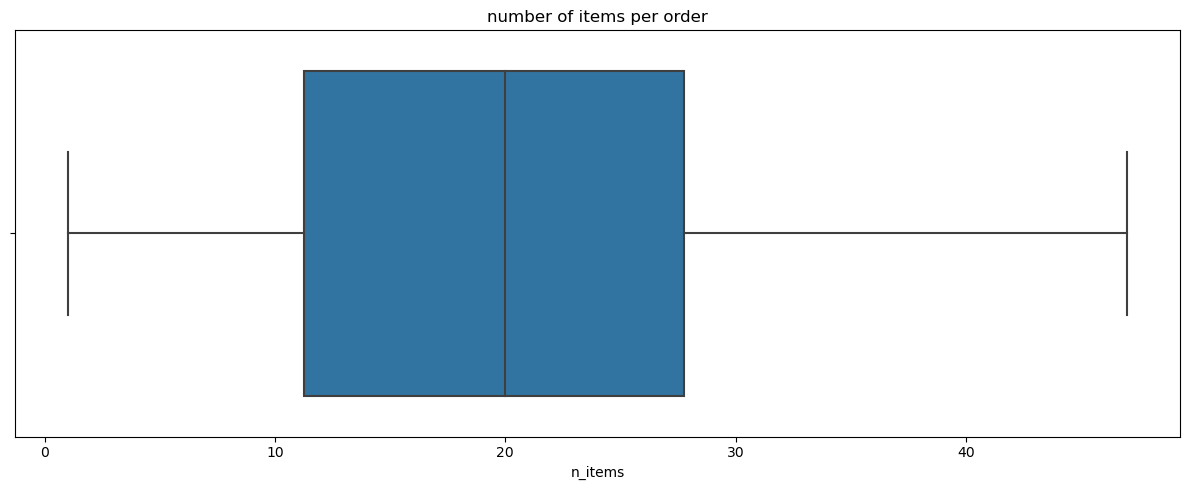

In [50]:
#plot number of items per user each order.
plt.rcParams["figure.autolayout"] = True
sns.boxplot(x=df_ipu["n_items"])
plt.title('number of items per order')
plt.show()

the average number of items per order is 20

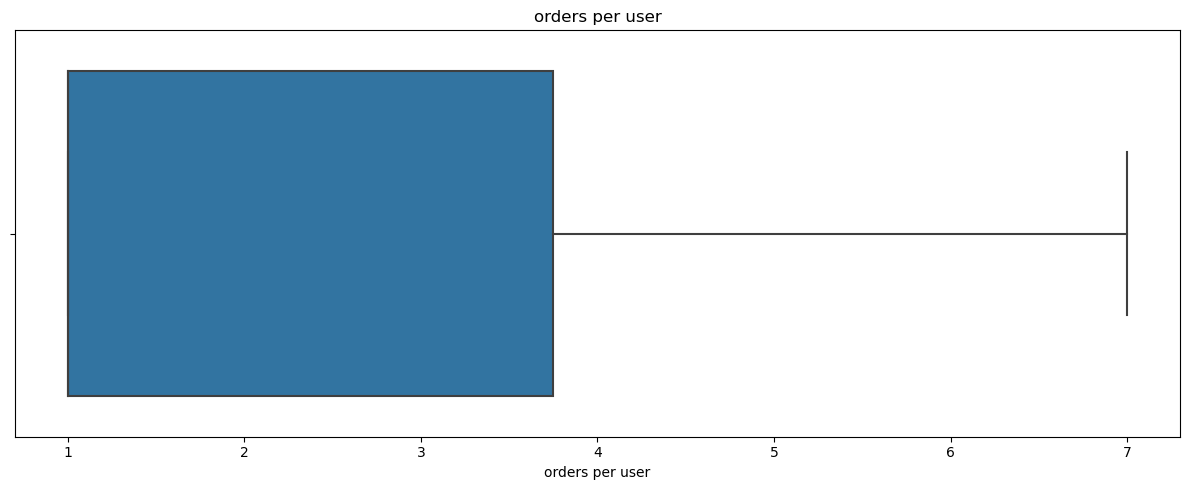

In [51]:
#plot orders per user
sns.boxplot(x=df_opu["invoiceno"])
plt.title('orders per user')
plt.xlabel('orders per user')
plt.show()

in average each user makes a 2.5 orders. we dont have an outliers here.

## plot graph to display quantity of items users usualy buy, items with high quantity values, what is more profitable, sell a lot of cheap items or sell less but more expensinve ones.

In [148]:
df_clean.describe()

,quantity,unitprice,customerid,revenue
count,528399.000000,528399.000000,396519.000000,528399.000000
mean,10.607707,3.276458,15301.351718,19.453861
std,156.860014,4.448566,1709.777503,268.443856
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,13975.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,11.000000,4.130000,16801.000000,17.400000
max,80995.000000,649.500000,18287.000000,168469.600000


In [166]:
#define cheap and expensive items
df_groups=df_clean.groupby(['group', 'date'])['revenue'].sum().reset_index()
df_groups

,group,date,revenue
0,average,2018-11-29,29037.21
1,average,2018-11-30,20006.22
2,average,2018-12-01,15100.16
3,average,2018-12-03,15436.41
4,average,2018-12-04,22359.45
...,...,...,...
910,expensive,2019-12-03,26554.52
911,expensive,2019-12-04,19274.23
912,expensive,2019-12-05,16171.18
913,expensive,2019-12-06,31355.02



</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Team Lead's comment: please, do not use hardcoding here. Also, why using Q3 +1.5IQR? Do you have normal data?</b>


</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Team Lead's comment: summing price again</b>
    

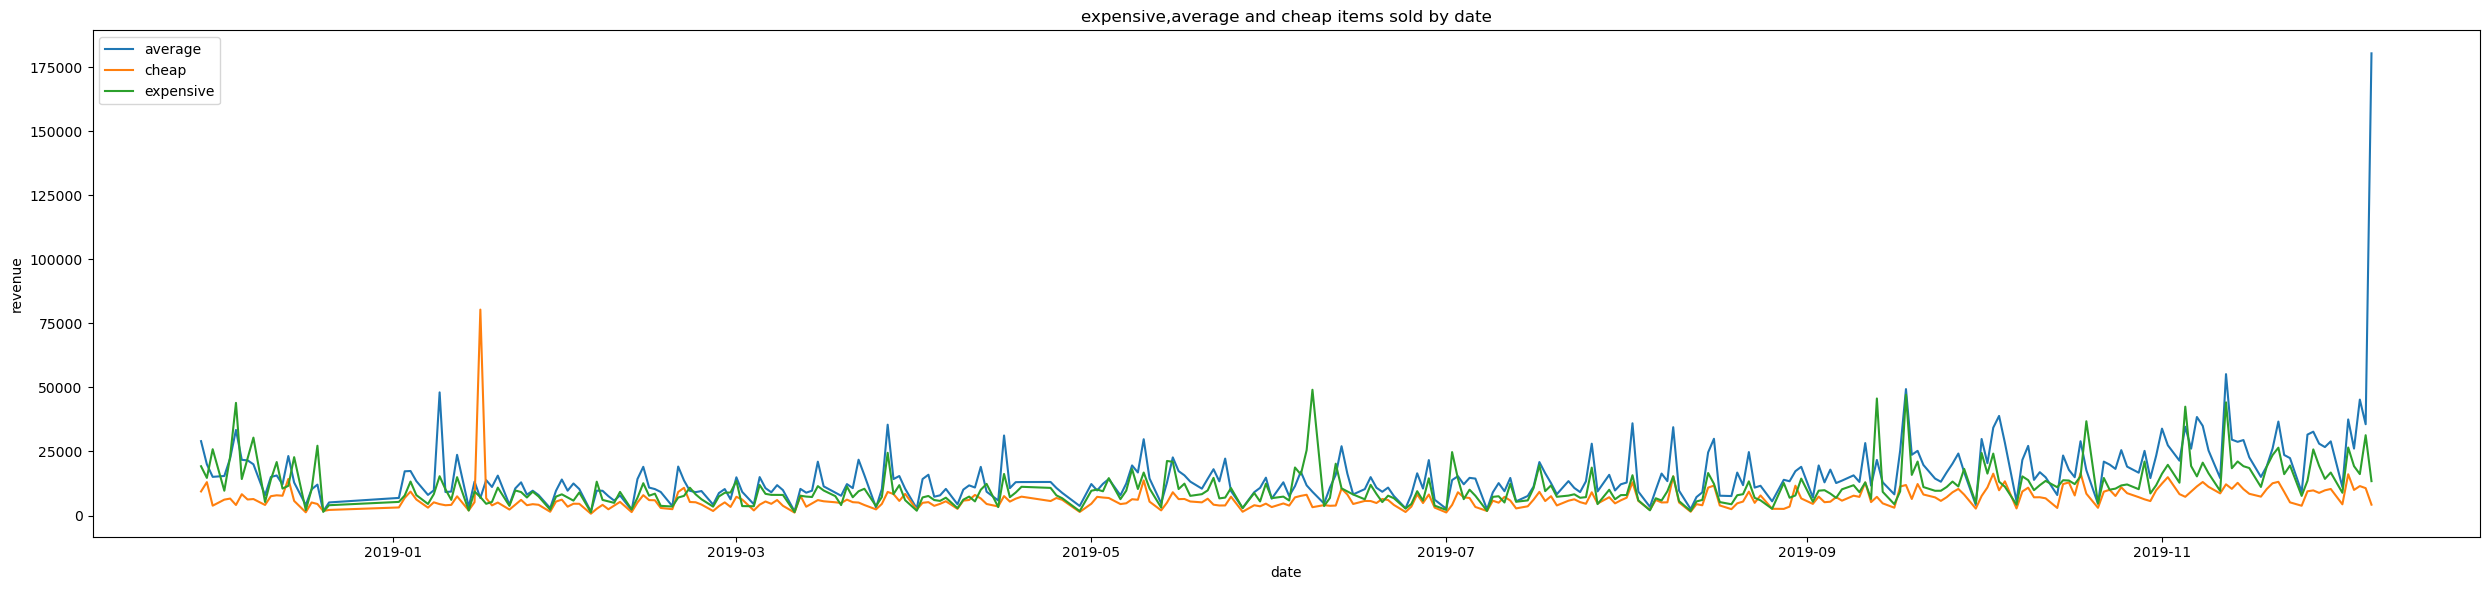

In [165]:
plt.rcParams["figure.figsize"] = (25,6)
sns.lineplot(data=df_groups, x="date", y="revenue", hue="group")
plt.ylabel('revenue')
plt.xlabel('date')
plt.title('expensive,average and cheap items sold by date')
plt.legend() 
plt.show()

graph shows, that we have sometimes jumps at cheap, expensive, and average items. but in general its more profitable to sell average price and expensive items.

## Step 4. Test the hypotheses:

check is there statistical significant difference between revenue of "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT "

In [132]:

# Separate the revenue data for the two items
item_1_revenue = df_clean[df_clean['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']['revenue']
item_2_revenue = df_clean[df_clean['description'] == 'JUMBO BAG RED RETROSPOT']['revenue']

# Perform the two-sample t-test
t_statistic, p_value = st.ttest_ind(item_1_revenue, item_2_revenue)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a statistically significant difference between the average revenue of the two items.")
else:
    print("There is no statistically significant difference between the average revenue of the two items.")


There is no statistically significant difference between the average revenue of the two items.



</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Team Lead's comment: What you're testing is whether the share of price of WHITE HANGING HEART T-LIGHT HOLDR in row 1  comparing to sum  of the prices (????) of other rows with WHITE HANGING HEART T-LIGHT HOLDR is different from the proportion of  price of JUMBO BAG RED RETROSPOT in row 1  comparing to sum  of the prices (????) of other rows with JUMBO BAG RED RETROSPOT. Sorry, this test doesn't make sense neither from mathematical point of view, nor from the busiess</b>

## check is there statistical significant difference between revenue of quarters

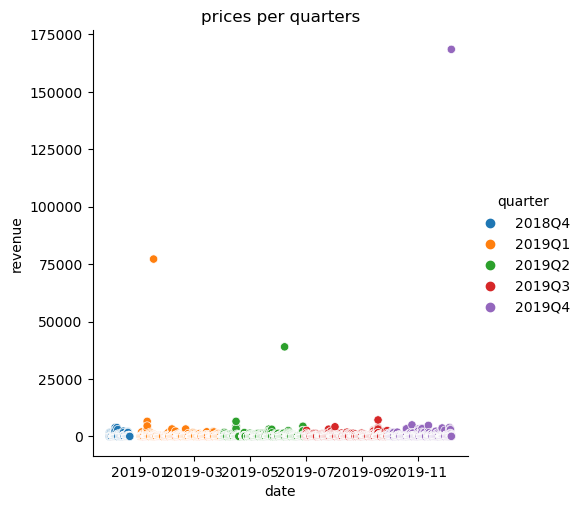

In [94]:
sns.relplot(data=df_clean, x="date", y="revenue", hue="quarter")
plt.title('prices per quarters')
plt.show()

In [93]:
df_clean.groupby('quarter')['revenue'].sum().reset_index()

,quarter,revenue
0,2018Q4,778625.910
1,2019Q1,1898300.670
2,2019Q2,1986132.741
3,2019Q3,2445884.013
4,2019Q4,3170457.140


In [134]:
# Separate the revenue data for each quarter
revenue_2018Q4 = df_clean[df_clean['quarter'] == '2018Q4']['revenue']
revenue_2019Q1 = df_clean[df_clean['quarter'] == '2019Q1']['revenue']
revenue_2019Q2 = df_clean[df_clean['quarter'] == '2019Q2']['revenue']
revenue_2019Q3 = df_clean[df_clean['quarter'] == '2019Q3']['revenue']
revenue_2019Q4 = df_clean[df_clean['quarter'] == '2019Q4']['revenue']

# Perform the one-way ANOVA test
f_statistic, p_value = st.f_oneway(
    revenue_2018Q4, revenue_2019Q1, revenue_2019Q2, revenue_2019Q3, revenue_2019Q4
)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a statistically significant difference between the revenues of the quarters.")
else:
    print("There is no statistically significant difference between the revenues of the quarters.")


There is no statistically significant difference between the revenues of the quarters.


</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Team Lead's comment: Same logic here, checking the price is not equal to checking revenue. And also, these proportions do not make sense. Please revise theory on testing</b>

statistical significant test shows that we have no difference between proportions of quarters revenue, wich means we have same revenue almost every time.

## General conclusion:

We analyzed our product store range, what can we conclude:

Range by dates in data set from 12-2018 to 12-2019

Data has a lot of missing values, anomalies like pretty high values and 0 values, negative price values, has a trash values like items that not connected to to our store. we investigate and fix it.

We study the product: quantity, price, popular sells, selling by date and analyze that, wich conclusion we made:<br>
Usualy store sells items in quantity of 10 items, but also we have some orders wich are extremely big like `PAPER CRAFT , LITTLE BIRDIE` and `MEDIUM CERAMIC TOP STORAGE JAR`<br>
We sold biger quantity of items in Q3-Q4 2019 then in Q1-Q2 2019 and because of that we have biger revenue in that quarters<br>
The most expensive item we have in the store is `PICNIC BASKET WICKER 60 PIECES`<br>
The item that brought bigest revenue from our data set is `REGENCY CAKESTAND 3 TIER	` brought in three times more profit average revenue from our data frame.<br>
The most popular items, that customers bought more that others is: `WHITE HANGING HEART T-LIGHT HOLDER`, `JUMBO BAG RED RETROSPOT`, `REGENCY CAKESTAND 3 TIER`.<br>

Every customers in average makes 2.5 orders, and order 20 items per order.

We can conclude, that more profitable to sell more expensive items, then cheap ones.

We investigated that we Dont have statistical significant difference between revenue of two most popular items: `WHITE HANGING HEART T-LIGHT HOLDER` and `JUMBO BAG RED RETROSPOT`.

We also conclude, that we dont have statistical significant difference between revenue of quarters.

    Some suggestions after all conclusions: 1. its good to have cheap and expensive items in the store, but expensive ones brings little bit more revenue. 2. revenue growth at end of the each year- brcause of the cristmas, people spend more, so good to have specific items for that period. 3. its good to have top of popular items from our analyze witch is `WHITE HANGING HEART T-LIGHT HOLDER`, `JUMBO BAG RED RETROSPOT`, `REGENCY CAKESTAND 3 TIER`. Good to have a top item per revenue REGENCY CAKESTAND 3 TIER.